In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>First Dataset<h2>

In [2]:
df_1 = pd.read_csv('sms_spam.csv')
df_1.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
df_1.shape

(5559, 2)

In [4]:
df_1.isna().sum()

type    0
text    0
dtype: int64

In [5]:
df_1.duplicated().sum()

403

In [6]:
df_1.drop_duplicates(inplace=True, keep='first')

In [7]:
df_1.shape

(5156, 2)

In [8]:
df_1.rename(columns={'type':'label', 'text': 'message'}, inplace=True)

In [9]:
df_1.columns

Index(['label', 'message'], dtype='object')

In [10]:
! pip install langdetect

In [11]:
from langdetect import detect

def detect_language(text):
  try:
    return detect(text)
  except:
    return 'Error'

In [12]:
df_1['language'] = df_1['message'].apply(detect_language)

In [13]:
df_1.sample(5)

,label,message,language
5396,ham,I dont know oh. Hopefully this month.,en
1528,ham,Hello. Sort of out in town already. That . So ...,en
1375,ham,I will send them to your email. Do you mind #...,en
686,spam,"URGENT!: Your Mobile No. was awarded a £2,000 ...",en
4691,ham,Not yet chikku..wat abt u?,sw


In [14]:
df_1['language'].unique()

array(['en', 'af', 'so', 'nl', 'cy', 'id', 'it', 'fr', 'de', 'pl', 'ca',
       'tl', 'pt', 'hr', 'no', 'lt', 'fi', 'et', 'sv', 'sl', 'es', 'ro',
       'da', 'sw', 'cs', 'vi', 'tr', 'sq', 'Error', 'sk'], dtype=object)

In [15]:
df_1['language'].value_counts()

en       4706
af         60
fr         39
so         35
cy         35
id         31
nl         28
no         25
it         23
de         18
hr         16
tl         16
ca         16
sw         15
da         13
et         11
sv         11
sl          8
pl          7
vi          7
sq          6
es          6
sk          5
pt          4
ro          3
fi          3
Error       3
cs          2
tr          2
lt          2
Name: language, dtype: int64

In [16]:
df_fr = df_1[df_1['language'] == 'fr']
df_fr.head()

,label,message,language
46,ham,I've sent u my part..,fr
79,ham,You flippin out yet?,fr
138,ham,No just send to you. Bec you in temple na.,fr
254,ham,I place all ur points on e cultures module alr...,fr
372,ham,Yes fine,fr


In [17]:
df_1.drop(columns='language', inplace=True)

In [18]:
df_1['label'].unique()

array(['ham', 'spam'], dtype=object)

<h2>Second Dataset<h2>

In [19]:
df_2 = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df_2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
df_2.shape

(5572, 5)

In [21]:
df_2.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [22]:
df_2.columns

Index(['v1', 'v2'], dtype='object')

In [23]:
df_2.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [24]:
df_2.columns

Index(['label', 'message'], dtype='object')

In [25]:
df_2.isna().sum()

label      0
message    0
dtype: int64

In [26]:
df_2.duplicated().sum()

403

In [27]:
df_2.drop_duplicates(inplace=True, keep='first')

In [28]:
df_2.shape

(5169, 2)

In [29]:
df_2['label'].unique()

array(['ham', 'spam'], dtype=object)

<h2>Concatenate these DataFrame into one<h2>

In [30]:
df = pd.concat([df_1, df_2], ignore_index=True, axis=0) # axis=0 (rows)
df.shape

(10325, 2)

In [31]:
df.head(1)

,label,message
0,ham,Hope you are having a good week. Just checking in


In [32]:
df.duplicated(subset='message').sum()

4259

In [33]:
df.drop_duplicates(keep='first', inplace=True, subset='message')

In [34]:
df.shape

(6066, 2)

<h2>Feature Eng.<h2>

In [35]:
import string

def count_punctuation(text):
  sum = 0
  for char in text:
    if char in string.punctuation:
      sum += 1
  return sum

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
df['punctuation_count'] = df['message'].apply(count_punctuation)

In [38]:
df.head()

,label,message,punctuation_count
0,ham,Hope you are having a good week. Just checking in,1
1,ham,K..give back my thanks.,3
2,ham,Am also doing in cbe only. But have to pay.,2
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4
4,spam,okmail: Dear Dave this is your final notice to...,5


In [39]:
df['char_count'] = df['message'].apply(len)

In [40]:
df.head()

,label,message,punctuation_count,char_count
0,ham,Hope you are having a good week. Just checking in,1,49
1,ham,K..give back my thanks.,3,23
2,ham,Am also doing in cbe only. But have to pay.,2,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149
4,spam,okmail: Dear Dave this is your final notice to...,5,161


In [41]:
import nltk # natural language Toolkit
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohdh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohdh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
w = df['message'][0]
w

'Hope you are having a good week. Just checking in'

In [43]:
len(nltk.word_tokenize(w))

11

In [44]:
def count_words(text):
  lis = str(text).split()
  return len(lis)

In [45]:
count_words(w)

10

In [46]:
# df['words_count'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
df['words_count'] = df['message'].apply(count_words)

In [48]:
df.head()

,label,message,punctuation_count,char_count,words_count
0,ham,Hope you are having a good week. Just checking in,1,49,10
1,ham,K..give back my thanks.,3,23,4
2,ham,Am also doing in cbe only. But have to pay.,2,43,10
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27


In [49]:
df['sentences_count'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2
1,ham,K..give back my thanks.,3,23,4,1
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3


In [51]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [52]:
stop_words = set(stopwords.words('english'))
def count_stopwords(text):
  words = nltk.word_tokenize(text)
  sum = 0
  for word in words:
    if word.lower() in stop_words:
      sum += 1
  return sum

In [53]:
df['stopwords_count'] = df['message'].apply(count_stopwords)

In [54]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6
1,ham,K..give back my thanks.,3,23,4,1,1
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7


In [55]:
import re

def count_urls(message):
    # This regular expression pattern looks for strings that start with http:// or https://
    # followed by one or more characters that are not spaces
    url_pattern = r'http[s]?://\S+'
    urls = re.findall(url_pattern, message)
    return len(urls), urls  # Returns the count of URLs and the list of found URLs

# Example usage:
message = "Visit https://www.example.com for more details or http://www.example.org to learn more."
url_count, urls_found = count_urls(message)
print(f"Number of URLs: {url_count}")
print(f"URLs found: {urls_found}")

Number of URLs: 2
URLs found: ['https://www.example.com', 'http://www.example.org']


In [56]:
def count_urls_used(message):
    url_pattern = r'http[s]?://\S+'
    urls = re.findall(url_pattern, message)
    return len(urls)

In [57]:
df['urls_count'] = df['message'].apply(count_urls_used)

In [58]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0
1,ham,K..give back my thanks.,3,23,4,1,1,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0


In [59]:
df['urls_count'].value_counts()

0    6048
1      18
Name: urls_count, dtype: int64

In [60]:
def count_capitalization(message):
    # Count the number of uppercase characters
    uppercase_chars = sum(1 for c in message if c.isupper())
    
    # Count the number of fully uppercase words
    uppercase_words = sum(1 for word in message.split() if word.isupper())
    
    # Return a pandas Series
    return pd.Series([uppercase_chars, uppercase_words])

In [61]:
df[['uppercase_characters_count', 'fully_uppercase_words_count']] = df['message'].apply(count_capitalization)

In [62]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3


## Message Entropy: Measure the randomness in the text, which might be indicative of spam.

In [63]:
import math
from collections import Counter

def calculate_entropy(message):
    # Count the frequency of each character in the message
    char_counts = Counter(message)
    
    # Calculate the probability of each character
    total_chars = len(message)
    char_probabilities = [count / total_chars for count in char_counts.values()]
    
    # Calculate the entropy
    entropy = -sum(p * math.log(p, 2) for p in char_probabilities if p > 0)
    
    return entropy

# Example usage:
message = "This is an example message for calculating entropy."
entropy = calculate_entropy(message)
print(f"Entropy of the message: {entropy}")

Entropy of the message: 4.120750284917237


In [64]:
df['message_entropy'] = df['message'].apply(calculate_entropy)

In [65]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0,4.080863
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0,3.936180
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0,4.076518
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3,5.102647
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3,4.912028


In [66]:
def count_email_addresses(message):
    # Regular expression for matching email addresses
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    
    # Find all occurrences of the email pattern
    emails = re.findall(email_pattern, message)
    
    return len(emails), emails  # Returns the count and the actual email addresses found

# Example usage:
message = "Please contact us at info@example.com or support@company.org for further assistance."
email_count, emails_found = count_email_addresses(message)
print(f"Number of email addresses: {email_count}")
print(f"Email addresses found: {emails_found}")

Number of email addresses: 2
Email addresses found: ['info@example.com', 'support@company.org']


In [67]:
df['email_addresses_count'] = df['message'].apply(lambda x: count_email_addresses(x)[0])

In [68]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0,4.080863,0
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0,3.936180,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0,4.076518,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3,5.102647,0
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3,4.912028,0


In [69]:
df['email_addresses_count'].value_counts()

0    6059
1       7
Name: email_addresses_count, dtype: int64

In [70]:
import re

def count_money_patterns(message):
    # Define a list of patterns related to money
    money_patterns = [
        r'\$\d+',  # Dollar amounts e.g. $100
        r'€\d+',   # Euro amounts e.g. €100
        r'£\d+',   # Pound amounts e.g. £100
        r'\d+\s?USD',  # Amounts with currency e.g. 100 USD
        r'\d+\s?EUR',  # Euro currency pattern
        r'\d+\s?GBP',  # Pound currency pattern
        r'\d+\s?dollars',  # Amounts spelled out e.g. 100 dollars
        r'\d+\s?euros',    # Euros spelled out
        r'\d+\s?pounds',   # Pounds spelled out
        r'\d+,\d+',        # Amounts with commas e.g. 1,000
        r'\d+\.\d+'        # Amounts with decimal points e.g. 99.99
    ]

    # Combine the patterns into a single regex
    money_regex = '|'.join(money_patterns)

    # Find all occurrences of the pattern
    money_matches = re.findall(money_regex, message)

    # Return the count of matches
    return len(money_matches), money_matches

# Example usage:
message = "You have won $10,000! To claim your prize of 10,000 dollars, please send a $20 processing fee."
money_count, money_hits = count_money_patterns(message)
print(f"Money-related patterns count: {money_count}")
print(f"Money-related patterns found: {money_hits}")

Money-related patterns count: 3
Money-related patterns found: ['$10', '10,000', '$20']


In [71]:
df['money_pattern_count'] = df['message'].apply(lambda x: count_money_patterns(x)[0])

In [72]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0,4.080863,0,0
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0,3.936180,0,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0,4.076518,0,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3,5.102647,0,1
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3,4.912028,0,0


In [73]:
df['money_pattern_count'].value_counts()

0    5557
1     381
2     118
3      10
Name: money_pattern_count, dtype: int64

In [74]:
def count_html_tags(message):
    # Regular expression for matching HTML tags
    html_tag_pattern = re.compile(r'<[^>]+>')
    
    # Find all occurrences of the pattern
    html_tags = re.findall(html_tag_pattern, message)
    
    return len(html_tags), html_tags

# Example usage:
message = "Check out our new deals at <a href='http://example.com'>our website</a>."
html_count, html_tags_found = count_html_tags(message)
print(f"Number of HTML tags: {html_count}")
print(f"HTML tags found: {html_tags_found}")

Number of HTML tags: 2
HTML tags found: ["<a href='http://example.com'>", '</a>']


In [75]:
df['html_tags_count'] = df['message'].apply(lambda x: count_html_tags(x)[0])

In [76]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count,html_tags_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0,4.080863,0,0,0
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0,3.936180,0,0,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0,4.076518,0,0,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3,5.102647,0,1,0
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3,4.912028,0,0,0


In [77]:
df['html_tags_count'].value_counts()

0    6059
1       7
Name: html_tags_count, dtype: int64

In [78]:
# Ham
df[df['label'] == 'ham'][['punctuation_count', 'char_count', 'words_count', 'sentences_count', 'stopwords_count', 'urls_count', 'uppercase_characters_count', 'fully_uppercase_words_count', 'message_entropy', 'email_addresses_count', 'money_pattern_count', 'html_tags_count']].describe()

,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count,html_tags_count
count,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.0,5183.000000,5183.000000,5183.000000,5183.000000,5183.000000,5183.0
mean,4.046691,73.733552,14.801466,1.854524,6.273587,0.0,4.361374,0.912792,3.965400,0.000193,0.010805,0.0
std,4.654913,59.288850,11.675867,1.511841,5.951497,0.0,11.404379,2.904587,0.312606,0.013890,0.132804,0.0
min,0.000000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,1.000000,34.000000,7.000000,1.000000,3.000000,0.0,1.000000,0.000000,3.803509,0.000000,0.000000,0.0
50%,3.000000,55.000000,11.000000,1.000000,5.000000,0.0,2.000000,0.000000,4.005588,0.000000,0.000000,0.0
75%,5.000000,96.000000,19.000000,2.000000,8.000000,0.0,3.000000,1.000000,4.160771,0.000000,0.000000,0.0
max,133.000000,910.000000,171.000000,38.000000,100.000000,0.0,129.000000,37.000000,4.931571,1.000000,3.000000,0.0


In [79]:
# Spam
df[df['label'] == 'spam'][['punctuation_count', 'char_count', 'words_count', 'sentences_count', 'stopwords_count', 'urls_count', 'uppercase_characters_count', 'fully_uppercase_words_count', 'message_entropy', 'email_addresses_count', 'money_pattern_count', 'html_tags_count']].describe()

,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count,html_tags_count
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,5.656852,139.523216,23.971687,3.040770,7.037373,0.020385,15.645527,2.638732,4.718252,0.006795,0.669309,0.007928
std,3.430725,28.322813,5.601495,1.533648,3.192566,0.141394,12.168882,2.719243,0.267715,0.082198,0.718589,0.088733
min,0.000000,13.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.308271,0.000000,0.000000,0.000000
25%,3.000000,133.000000,22.000000,2.000000,5.000000,0.000000,8.000000,1.000000,4.548350,0.000000,0.000000,0.000000
50%,5.000000,149.000000,25.000000,3.000000,7.000000,0.000000,14.000000,2.000000,4.740022,0.000000,1.000000,0.000000
75%,8.000000,157.000000,28.000000,4.000000,9.000000,0.000000,21.000000,4.000000,4.920513,0.000000,1.000000,0.000000
max,26.000000,224.000000,35.000000,9.000000,18.000000,1.000000,128.000000,27.000000,5.257202,1.000000,3.000000,1.000000


<h2>Data Balancing<h2>

Which is good for training a machine learning model becouse it reduces the risk of the model being biased towards one class

In [80]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count,html_tags_count
0,ham,Hope you are having a good week. Just checking in,1,49,10,2,6,0,2,0,4.080863,0,0,0
1,ham,K..give back my thanks.,3,23,4,1,1,0,1,0,3.936180,0,0,0
2,ham,Am also doing in cbe only. But have to pay.,2,43,10,2,7,0,2,0,4.076518,0,0,0
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",4,149,21,3,7,0,24,3,5.102647,0,1,0
4,spam,okmail: Dear Dave this is your final notice to...,5,161,27,3,7,0,19,3,4.912028,0,0,0


In [81]:
df['label'].value_counts() # Data Umbalanced

ham     5183
spam     883
Name: label, dtype: int64

In [82]:
ham = df[df['label'] == 'ham']
ham.shape

(5183, 14)

In [83]:
spam = df[df['label'] == 'spam']
spam.shape

(883, 14)

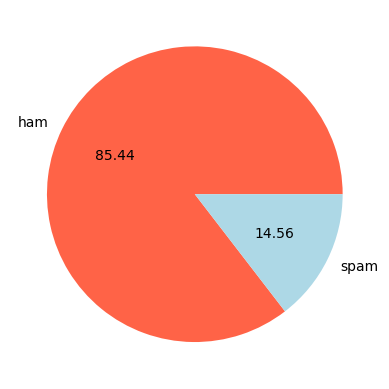

In [84]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', colors=['tomato', 'lightblue'])
plt.show()

In [85]:
ham = ham.sample(spam.shape[0])

In [86]:
ham.shape

(883, 14)

In [87]:
df = pd.concat([ham, spam], axis=0, ignore_index=True)
df.shape

(1766, 14)

In [88]:
df.head()

,label,message,punctuation_count,char_count,words_count,sentences_count,stopwords_count,urls_count,uppercase_characters_count,fully_uppercase_words_count,message_entropy,email_addresses_count,money_pattern_count,html_tags_count
0,ham,Eatin my lunch...,3,17,3,1,1,0,1,0,3.572469,0,0,0
1,ham,Your account has been refilled successfully by...,4,150,26,3,8,0,28,5,4.483643,0,0,0
2,ham,So u workin overtime nigpun?,1,28,5,1,1,0,1,0,3.797903,0,0,0
3,ham,"Sorry vikky, i'm Watching olave mandara movie ...",4,84,14,1,3,0,2,0,4.283302,0,0,0
4,ham,"If you're still up, maybe leave the credit car...",2,99,23,1,12,0,3,2,4.112365,0,0,0


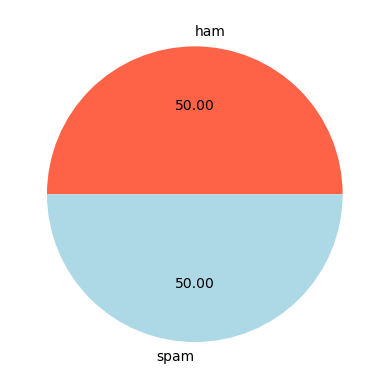

In [89]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f', colors=['tomato', 'lightblue'])
plt.show()

<h2>EDA (Exploratory Data Analysis)<h2>

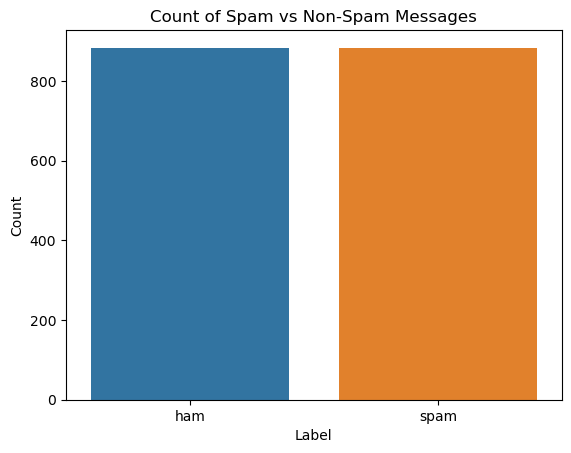

In [90]:
sns.countplot(x='label', data=df)
plt.title('Count of Spam vs Non-Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### This plot shows the distribution of the number of uppercase characters in your messages, separated by the labels (spam or ham).

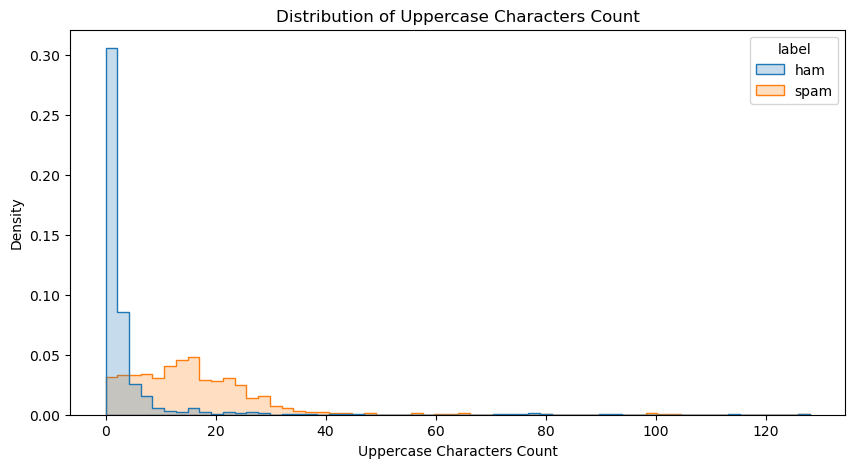

In [91]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='uppercase_characters_count', hue='label', element='step', stat='density', common_norm=False)
plt.title('Distribution of Uppercase Characters Count')
plt.xlabel('Uppercase Characters Count')
plt.ylabel('Density')
plt.show()

In [92]:
def optimal_bin_width(data):
  # Calculate IQR (Interquartile range)
  IQR = np.percentile(data, 75) - np.percentile(data, 25)
  # Freedman Rule
  bin_width = 2 * IQR * (len(data) ** (-1/3))
  # Calculate the total number of bins
  bins = int((max(data) - min(data)) / bin_width)
  return bins

In [93]:
optimal_bins_ham = optimal_bin_width(ham['char_count'])
print(optimal_bins_ham)
optimal_bins_spam = optimal_bin_width(spam['char_count'])
print(optimal_bins_spam)

31
42


In [94]:
# Calculate the unique values and their counts for HAM
values, counts = np.unique(ham['char_count'], return_counts=True)
# The mode is the value with the highest count
mode_ham = values[np.argmax(counts)]

# Repeat for SPAM
values, counts = np.unique(spam['char_count'], return_counts=True)
mode_spam = values[np.argmax(counts)]

In [95]:
mean_ham = np.mean(ham['char_count'])
mean_spam = np.mean(spam['char_count'])
median_ham = np.median(ham['char_count'])
median_spam = np.median(spam['char_count'])

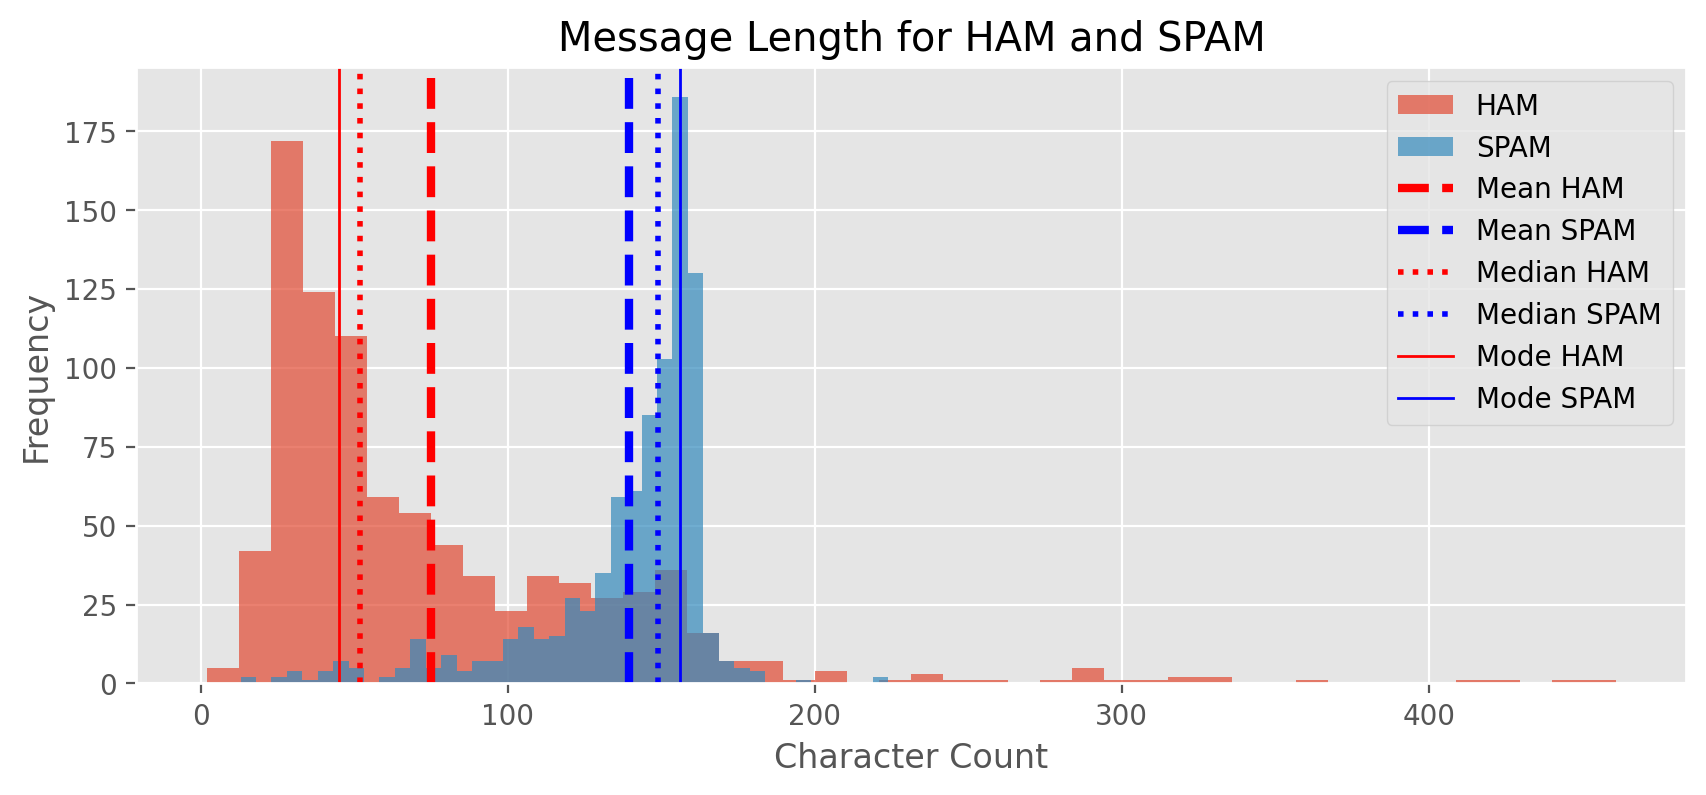

In [96]:
plt.figure(figsize=(10,4), dpi=200)
plt.style.use('ggplot')
plt.hist(ham['char_count'], bins=44, alpha=0.7, label='HAM')
plt.hist(spam['char_count'], bins=42, alpha=0.7,label='SPAM')
plt.axvline(mean_ham, color='red', linestyle='dashed', linewidth=3, label='Mean HAM')
plt.axvline(mean_spam, color='blue', linestyle='dashed', linewidth=3, label='Mean SPAM')
plt.axvline(median_ham, color='red', linestyle='dotted', linewidth=2, label='Median HAM')
plt.axvline(median_spam, color='blue', linestyle='dotted', linewidth=2, label='Median SPAM')
plt.axvline(mode_ham, color='red', linestyle='solid', linewidth=1, label='Mode HAM')
plt.axvline(mode_spam, color='blue', linestyle='solid', linewidth=1, label='Mode SPAM')
plt.ylabel('Frequency')
plt.xlabel('Character Count')
# plt.xlim(0,500)
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show()

### HAM
Right-Skewed (Positively Skewed):

The tail of the distribution extends to the right, towards the higher values.

The bulk of the data is concentrated on the left side of the histogram.

The mean of this distribution will be greater than the mode (the highest peak on the histogram), and the mean will be the highest among the three measures of central tendency.

### SPAM
Left-Skewed (Negatively Skewed):

The tail of the distribution extends to the left, towards the lower values.

Most of the data is concentrated on the right side of the histogram.

The mean and median of this distribution will be less than the mode, with the mean being the lowest among the three measures of central tendency.

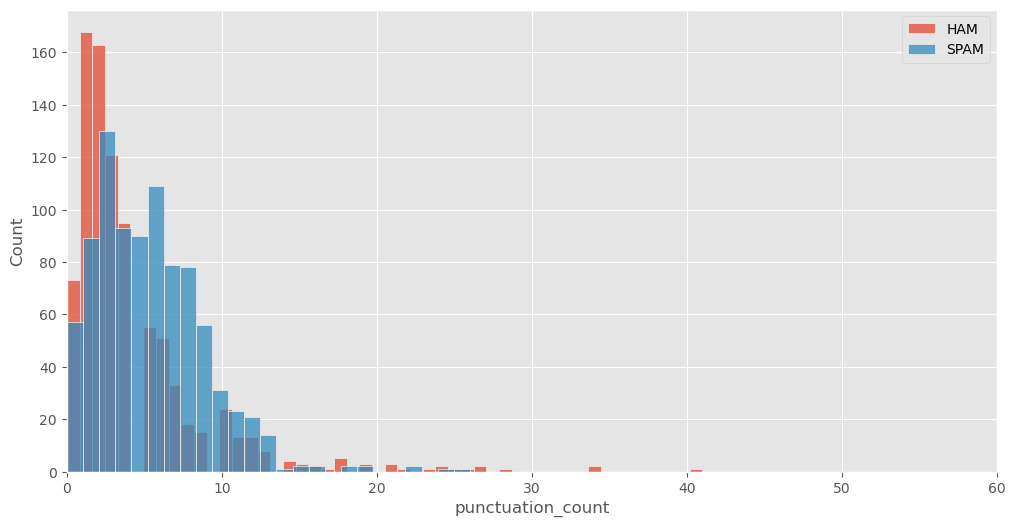

In [97]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 'ham']['punctuation_count'], label='HAM')
sns.histplot(df[df['label'] == 'spam']['punctuation_count'],label='SPAM')
plt.xlim(0,60)
plt.legend()
plt.show()

The bottom (x-axis) shows the number of punctuation marks in an email.

The side (y-axis) shows how many emails have that number of punctuation marks.

Both HAM and SPAM emails mostly have few punctuation marks.

There are some SPAM emails with more punctuation marks than HAM emails.

The chart suggests that HAM  emails tend to use fewer punctuation marks, while SPAM emails might have more.

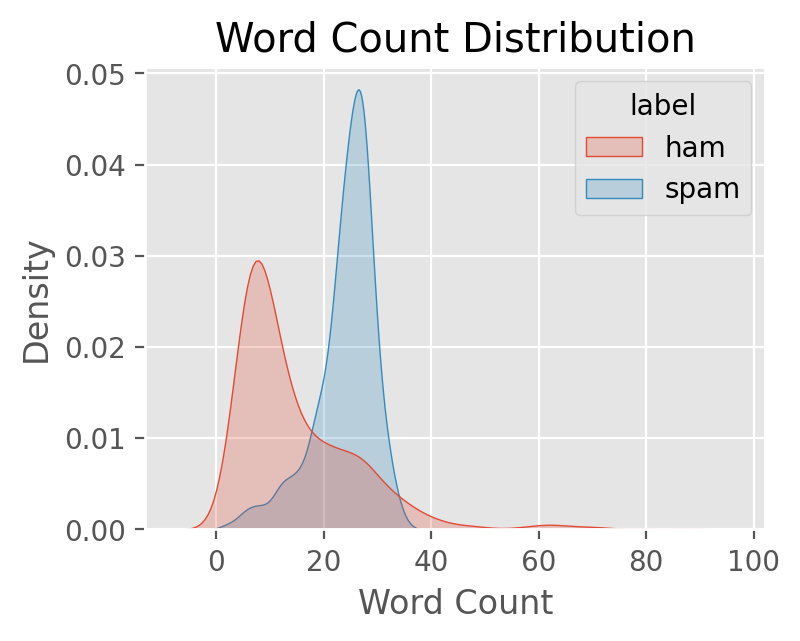

In [98]:
plt.figure(figsize=(4,3), dpi=200)

sns.kdeplot(data=df, x='words_count', hue='label', fill=True)

plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.show()

Spam emails tend to have a similar number of words, usually around 20 to 40 words.

Ham emails vary more in length, but they often have fewer words than spam


There's some overlap, which means that some ham and spam emails have the same word count.

### Outliers

##### 1) Interquartile Range (IQR):
   
The IQR is the difference between the 75th and 25th percentiles. Data points that are below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR are considered outliers.

In [99]:
df.columns

Index(['label', 'message', 'punctuation_count', 'char_count', 'words_count',
       'sentences_count', 'stopwords_count', 'urls_count',
       'uppercase_characters_count', 'fully_uppercase_words_count',
       'message_entropy', 'email_addresses_count', 'money_pattern_count',
       'html_tags_count'],
      dtype='object')

In [100]:
def analyze_outliers(df):
    # Calculate IQR for Length
    Q1_length = df['char_count'].quantile(0.25)
    Q3_length = df['char_count'].quantile(0.75)
    IQR_length = Q3_length - Q1_length
    lower_bound_length = Q1_length - 1.5 * IQR_length
    upper_bound_length = Q3_length + 1.5 * IQR_length

    # Identify length outliers
    length_outliers = df[(df['char_count'] < lower_bound_length) | (df['char_count'] > upper_bound_length)]

    # Calculate IQR for Word Count
    Q1_word_count = df['words_count'].quantile(0.25)
    Q3_word_count = df['words_count'].quantile(0.75)
    IQR_word_count = Q3_word_count - Q1_word_count
    lower_bound_word_count = Q1_word_count - 1.5 * IQR_word_count
    upper_bound_word_count = Q3_word_count + 1.5 * IQR_word_count

    # Identify word count outliers
    word_count_outliers = df[(df['words_count'] < lower_bound_word_count) | (df['words_count'] > upper_bound_word_count)]

    # Summary
    summary = {
        "Length_Outliers": length_outliers,
        "Word_Count_Outliers": word_count_outliers,
        "Length_Outliers_Count": len(length_outliers),
        "Word_Count_Outliers_Count": len(word_count_outliers)
    }

    return summary


# Running the outlier analysis
outlier_analysis_result = analyze_outliers(df)
outlier_analysis_result

{'Length_Outliers':     label                                            message  \
 96    ham  I was wondering if it would be okay for you to...   
 150   ham  Storming msg: Wen u lift d phne, u say HELLO D...   
 437   ham  Solve d Case : A Man Was Found Murdered On  DE...   
 455   ham  No i'm not. I can't give you everything you wa...   
 493   ham  #  is fast approaching. So, Wish u a very Happ...   
 499   ham  &lt;#&gt;  is fast approaching. So, Wish u a v...   
 529   ham  no, i *didn't* mean to post it. I wrote it, an...   
 810   ham  It so happens that there r 2waxsto do wat you ...   
 868   ham  We know TAJ MAHAL as symbol of love. But the o...   
 
      punctuation_count  char_count  words_count  sentences_count  \
 96                   5         330           69                4   
 150                 34         320           79               17   
 437                 34         428           71               13   
 455                 23         363           72     

##### 2) Visualization Techniques:

Box Plots: A box plot can visually show the distribution of your data. Points that lie outside the whiskers of the box plot can be considered outliers.

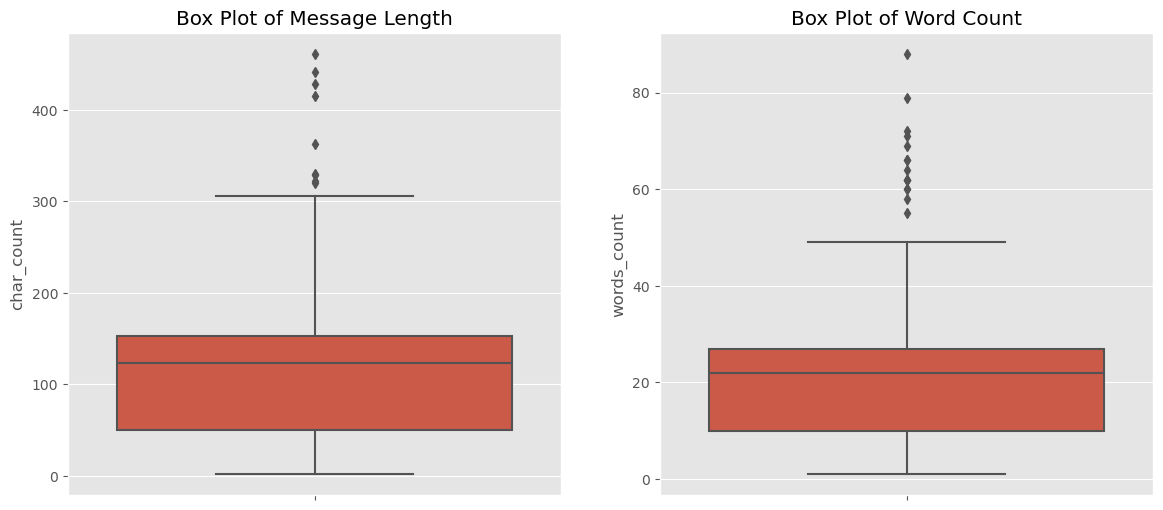

In [101]:
# Plotting the box plots for message length and word count
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['char_count'])
plt.title('Box Plot of Message Length')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['words_count'])
plt.title('Box Plot of Word Count')

plt.show()

In [102]:
print('"char_count featuer Outliers"')
print(df[df['char_count']>= 300].count())

"char_count featuer Outliers"
label                          11
message                        11
punctuation_count              11
char_count                     11
words_count                    11
sentences_count                11
stopwords_count                11
urls_count                     11
uppercase_characters_count     11
fully_uppercase_words_count    11
message_entropy                11
email_addresses_count          11
money_pattern_count            11
html_tags_count                11
dtype: int64


<Axes: xlabel='char_count'>

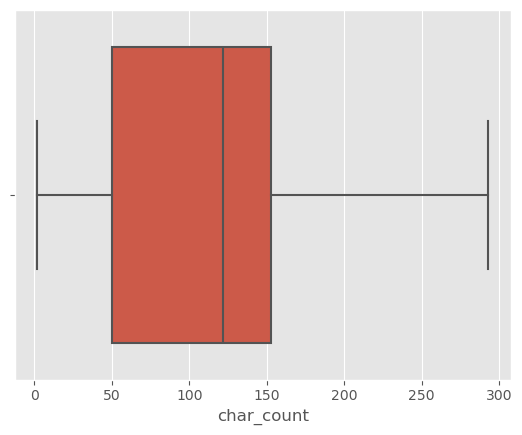

In [103]:
df = df[df['char_count']<300]
sns.boxplot(x=df['char_count'])

In [104]:
print('"words_count featuer Outliers"')
print(df[df['words_count']>= 50].count())

"words_count featuer Outliers"
label                          5
message                        5
punctuation_count              5
char_count                     5
words_count                    5
sentences_count                5
stopwords_count                5
urls_count                     5
uppercase_characters_count     5
fully_uppercase_words_count    5
message_entropy                5
email_addresses_count          5
money_pattern_count            5
html_tags_count                5
dtype: int64


<Axes: xlabel='words_count'>

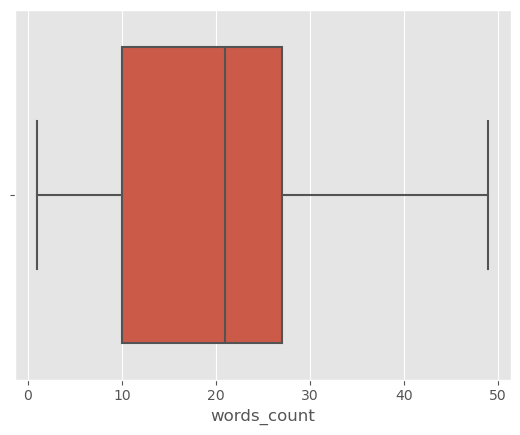

In [105]:
df = df[df['words_count']<50]
sns.boxplot(x=df['words_count'])

### Correlation

The correlation values range from 1 (perfect positive correlation) to -1 (perfect negative correlation), with 0 indicating no correlation. Values close to 1 or -1 indicate a strong relationship, while values close to 0 indicate a weak relationship. The color intensity and the numerical value in each cell on the heatmap represent the strength and direction of the correlation.

C:\Users\mohdh\AppData\Local\Temp\ipykernel_28720\2525289035.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_label = df.corr()


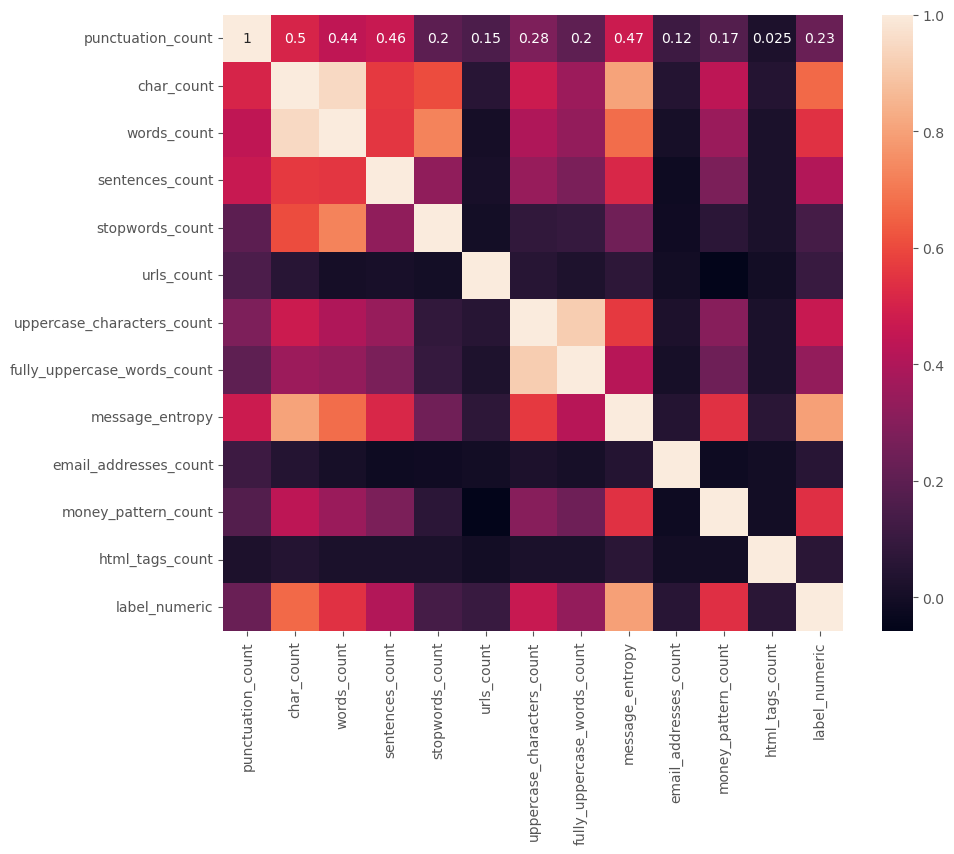

In [106]:
df['label_numeric'] = df['label'].map({'ham': 0, 'spam': 1})

# Compute the correlation matrix including the numerical label
corr_with_label = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_label, annot=True)
plt.show()

Value of 1: This is found along the diagonal and indicates a perfect positive correlation, which is expected since it’s the correlation of a feature with itself.


punctuation_count and stopwords_count (0.28): A weak positive correlation, suggesting that there is a slight tendency for texts with more stopwords to have more punctuation, but the relationship is not very strong.

char_count and words_count (0.96): A very strong positive correlation, which is expected because more words usually mean more characters.

Because the relationship is so strong, these two features may carry very similar information about the size of the text. In the context of modeling or analysis, this could imply:

Redundancy: Since both features convey almost the same information, using both might be redundant for predictive modeling or statistical analysis.

Data Compression: If you are trying to reduce the dimensionality of your data, you might combine these features or choose one over the other to represent the text length.

### Here's the breakdown of the correlation coefficients between 'label_numeric'(Our Target) and other features:
punctuation_count and label_numeric (0.22): A weak positive correlation, suggesting that there might be a slight tendency for messages with more punctuation to be associated with one category of the 'label_numeric' variable (possibly spam).

char_count and label_numeric (0.56): A moderate positive correlation, indicating that messages with a higher character count might be more likely to be associated with one category of the 'label_numeric' variable (possibly spam).

stopwords_count and label_numeric (0.064): A very weak positive correlation, which suggests almost no linear relationship between the number of stopwords in a message and the 'label_numeric' variable.

<h1>Data Pre-processing<h1>

<h2>Label Encoder<h2>

In [107]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # create object

In [109]:
df['label'] = encoder.fit_transform(df['label'])

In [110]:
df['label'].unique()

array([0, 1])

In [111]:
# df['label'] = df['label'].map({'ham':0, 'spam':1})

In [112]:
df.shape

(1750, 15)

In [113]:
df.columns

Index(['label', 'message', 'punctuation_count', 'char_count', 'words_count',
       'sentences_count', 'stopwords_count', 'urls_count',
       'uppercase_characters_count', 'fully_uppercase_words_count',
       'message_entropy', 'email_addresses_count', 'money_pattern_count',
       'html_tags_count', 'label_numeric'],
      dtype='object')

"He plays wEll"

"he plays well" # lowerCase

"he" "plays" "well" # split

"plays" "well" # stopwords

"play" "good"  # source

"play good"    # join

In [114]:
import re # RegExpression
# import unicodedata

In [115]:
# x = 'Café Voilà El niño Cafe Voila El nino'
# unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8')

In [116]:
# email_pattern = r"^\S+@\S+\.\S+$"
# url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [117]:
def remove_email(text):
  email_pattern = r"^\S+@\S+\.\S+$"
  return re.sub(email_pattern, ' ', text)

def remove_url(text):
  url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
  return re.sub(url_pattern, ' ', text)

# def accented_chars(text):
#   text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
#   return text

In [118]:
df['message'] = df['message'].apply(remove_email)
df['message'] = df['message'].apply(remove_url)
# df['message'] = df['message'].apply(accented_chars)

In [119]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [120]:
corpus = []
for i in range(len(df)):
  sen = df['message'][i].lower()
  sen = re.sub('[^a-z]', ' ', sen)
  sen = str(sen)
  sen = sen.split()
  sen = [word for word in sen if word not in stopwords.words('english')]
  sen = [ps.stem(word) for word in sen]
  sen = ' '.join(sen)
  corpus.append(sen)

KeyError: 15

In [ ]:
type(corpus)

In [ ]:
df['message'][0]

In [ ]:
corpus[0]

In [ ]:
temp = pd.DataFrame(corpus, columns=['message'])
temp.head()

In [ ]:
df['message'] = temp['message']
df['message'][0]

In [ ]:
df.shape

In [ ]:
spam_corpus = []
for msg in df[df['label'] == 1]['message']:
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.title('The most common words in SPAM')
plt.show()

In [121]:
ham_corpus = []
for msg in df[df['label'] == 0]['message']:
  for word in msg.split():
    ham_corpus.append(word)

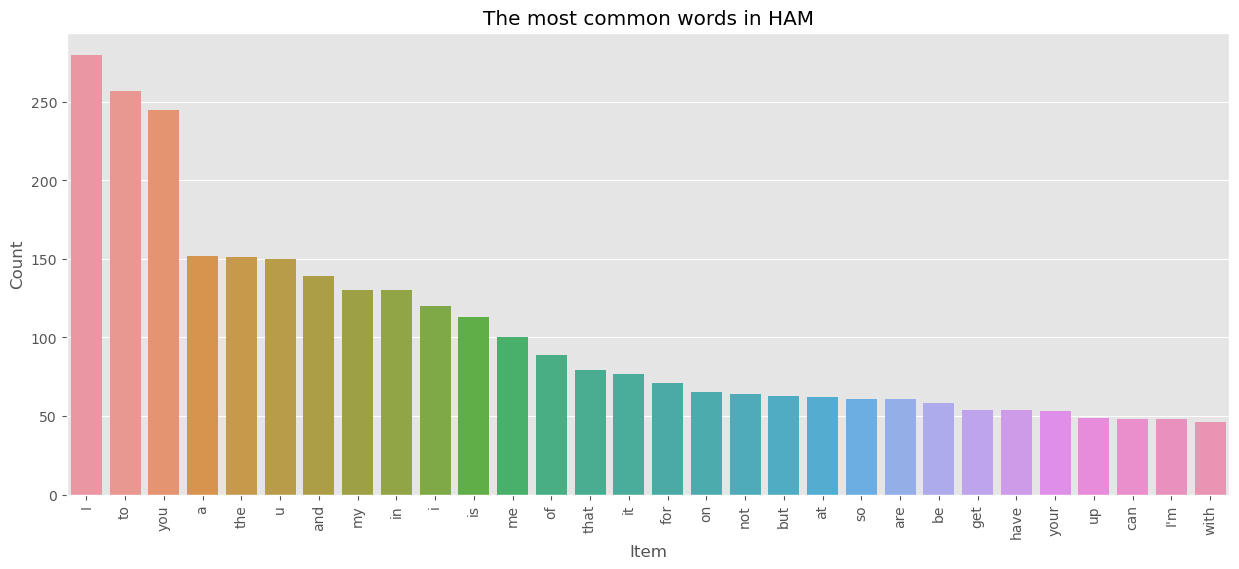

In [122]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.title('The most common words in HAM')
plt.show()

In [123]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [124]:
# spam
spam_wc = wc.generate(df[df['label'] == 1]['message'].str.cat(sep=" "))

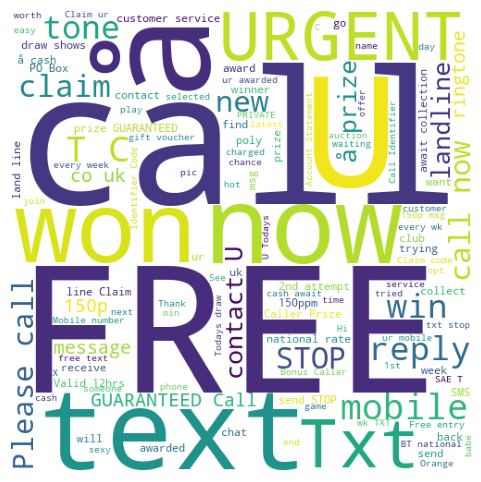

In [125]:
plt.figure(figsize=(15,6))
plt.axis("off")
plt.imshow(spam_wc)
plt.show()

In [126]:
# ham
ham_wc = wc.generate(df[df['label'] == 0]['message'].str.cat(sep=" "))

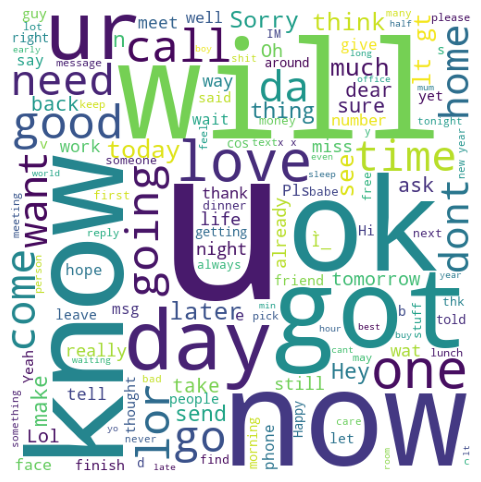

In [127]:
plt.figure(figsize=(15,6))
plt.axis("off")
plt.imshow(ham_wc)
plt.show()

<h3>Save Data<h3>

In [128]:
df.to_csv('SPAM_Cleaned.csv')

<h2>ML Model<h2>

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [130]:
df.isna().sum()

label                          0
message                        0
punctuation_count              0
char_count                     0
words_count                    0
sentences_count                0
stopwords_count                0
urls_count                     0
uppercase_characters_count     0
fully_uppercase_words_count    0
message_entropy                0
email_addresses_count          0
money_pattern_count            0
html_tags_count                0
label_numeric                  0
dtype: int64

In [131]:
X = df['message']
y = df['label']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=0, stratify=y)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1487,), (263,), (1487,), (263,))

<h3>SVM<h3>

In [134]:
# cv = TfidfVectorizer()
# vectorizer = cv.fit_transform(X_train)
# vectorizer

In [135]:
# feature_name = cv.get_feature_names_out()
# feature_name

In [136]:
# for i,j in zip(vectorizer.nonzero()[0], vectorizer.nonzero()[1]):
#   word = feature_name[j]
#   value = vectorizer[i,j]
#   print(f'document {i}, word: {word},  TFI vlaue: {value}')

In [137]:
svm_model_cv = Pipeline([
    ('cv', CountVectorizer()),
    ('svm_cv', SVC())
])

svm_model_cv.fit(X_train, y_train) # Training
y_pred_svm_cv = svm_model_cv.predict(X_test)
accuracy_svm_cv = accuracy_score(y_test, y_pred_svm_cv)
precision_svm_cv = precision_score(y_test, y_pred_svm_cv)

In [138]:
accuracy_svm_cv, precision_svm_cv

(0.9467680608365019, 0.968503937007874)

In [139]:
svm_model_tfi = Pipeline([
    ('tfi', TfidfVectorizer()),
    ('svm_tfi', SVC())
])

svm_model_tfi.fit(X_train, y_train) # Training
y_pred_svm_tfi = svm_model_tfi.predict(X_test)
accuracy_svm_tfi = accuracy_score(y_test, y_pred_svm_tfi)
precision_svm_tfi = precision_score(y_test, y_pred_svm_tfi)

In [140]:
accuracy_svm_tfi, precision_svm_tfi

(0.9581749049429658, 0.9841269841269841)

In [141]:
svm_model_tfi.predict(['free lottery tickets for you'])

array([1])

In [142]:
svm_model_tfi.predict(['you have won lottery ticket worth $1000, please click here to claim'])

array([1])

In [143]:
svm_model_tfi.predict(['hi, how are you doing today?'])

array([0])

In [144]:
svm_model_tfi.predict(["Meeting at 3 PM, don't forget to bring the reports"])

array([0])

<h3>LogisticRegression<h3>

In [145]:
lr_model_tfi = Pipeline([
    ('tfi', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

lr_model_tfi.fit(X_train, y_train) # Training
y_pred_lr_tfi = lr_model_tfi.predict(X_test)
accuracy_lr_tfi = accuracy_score(y_test, y_pred_lr_tfi)
precision_lr_tfi = precision_score(y_test, y_pred_lr_tfi)

In [146]:
accuracy_lr_tfi, precision_lr_tfi

(0.9543726235741445, 0.9618320610687023)

In [147]:
lr_model_tfi.predict(['you have won lottery ticket worth $1000, please click here to claim'])

array([1])

<h3>RandomForest<h3>

In [148]:
rfc_model_tfi = Pipeline([
    ('tfi', TfidfVectorizer()),
    ('rfc', RandomForestClassifier())
])

rfc_model_tfi.fit(X_train, y_train) # Training
y_pred_rfc_tfi = rfc_model_tfi.predict(X_test)
accuracy_rfc_tfi = accuracy_score(y_test, y_pred_rfc_tfi)
precision_rfc_tfi = precision_score(y_test, y_pred_rfc_tfi)

In [149]:
accuracy_rfc_tfi, precision_rfc_tfi

(0.9543726235741445, 1.0)

In [150]:
rfc_model_tfi.predict(['free lottarey tickets for you'])

array([0])

<h3>NB<h3>

In [151]:
bnb_model_tfi = Pipeline([
    ('tfi', TfidfVectorizer()),
    ('bnb', BernoulliNB())
])

bnb_model_tfi.fit(X_train, y_train) # Training
y_pred_bnb_tfi = bnb_model_tfi.predict(X_test)
accuracy_bnb_tfi = accuracy_score(y_test, y_pred_bnb_tfi)
precision_bnb_tfi = precision_score(y_test, y_pred_bnb_tfi)

In [152]:
accuracy_bnb_tfi, precision_bnb_tfi

(0.935361216730038, 0.9915254237288136)

In [153]:
bnb_model_tfi.predict(['free lottarey tickets for you'])

array([0])

<h3>Confusion Matrix<h3>

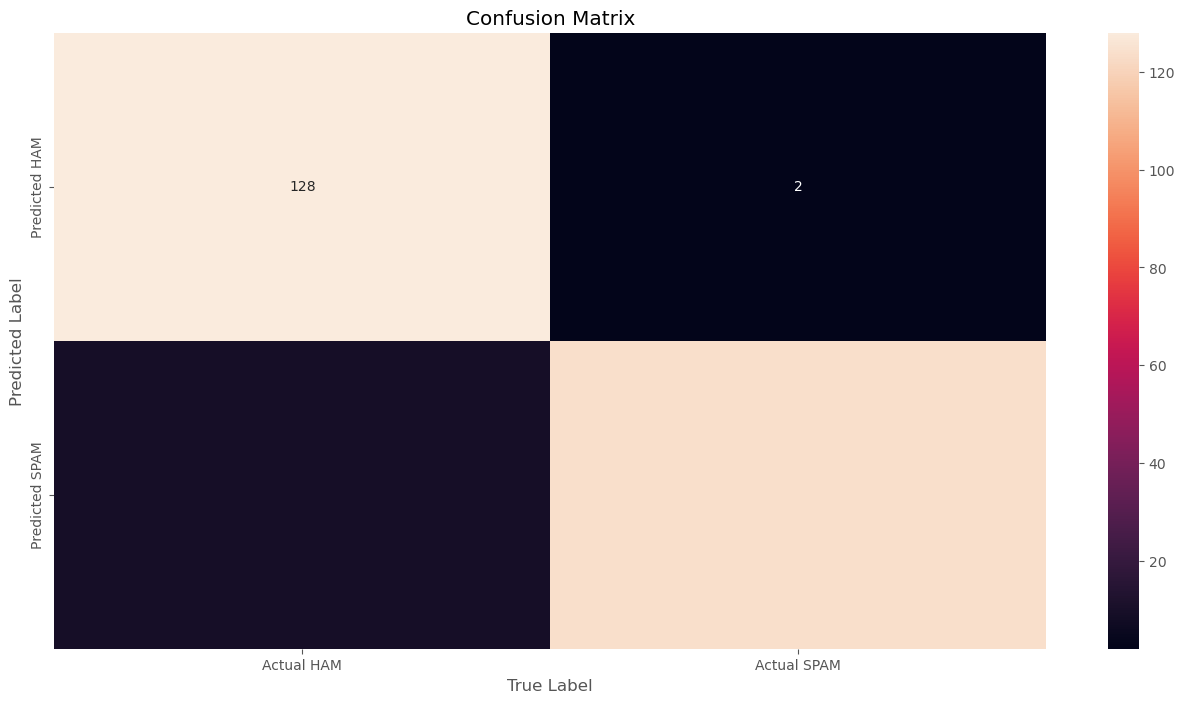

In [154]:
cm = confusion_matrix(y_test, y_pred_svm_tfi)
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Actual HAM', 'Actual SPAM'], yticklabels=['Predicted HAM', 'Predicted SPAM'])
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In a spam SMS project using Natural Language Processing (NLP), both accuracy and precision are important, but their importance may vary depending on the specific goals and context of the project.

Accuracy: This measures how often your model is correct, regardless of whether the predictions are for spam or not spam. High accuracy is important to ensure that the model is generally reliable.

Precision: This specifically measures how often your model is correct when it predicts spam. High precision is crucial in a spam detection context because it means that when the model identifies a message as spam, it is likely to be correct. This helps in minimizing the number of non-spam messages incorrectly classified as spam, which is important for user experience.

In a spam SMS project, precision is often considered more important because the cost of misclassifying a legitimate message as spam (a false positive) can be higher than missing a spam message (a false negative). Users may miss important messages if they are incorrectly marked as spam. However, focusing solely on precision might lead to a model that is overly cautious and misses a lot of actual spam (low recall). Therefore, it's essential to balance precision with recall and accuracy. A common practice is to use metrics like the F1 score, which balances precision and recall, to evaluate and optimize the model.

Accuracy: The proportion of true results among the total number of cases examined. It is a measure of how many classifications are correct, both spam and ham.

##### Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

Precision: The proportion of true positive identifications (correctly identified spam) among all positive identifications (all emails classified as spam). It reflects how reliable the model is when it predicts an email is spam.

##### Precision Score = True Positives/ (False Positives + True Positives)

Recall (Sensitivity): The proportion of actual positives (actual spam emails) that were identified correctly. In the context of spam detection, a high recall means that the model catches a high number of spam emails.

##### Recall Score = True Positives / (False Negatives + True Positives)

F1-Score: The harmonic mean of precision and recall. It is a single metric that combines both precision and recall. A high F1-score indicates that you have a balance between precision and recall.

##### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

<h3>Save Model<h3>

In [155]:
import pickle
pickle.dump(svm_model_tfi, open('model_svm.pkl', 'wb'))

<h3>Load Model<h3>

In [156]:
model = pickle.load(open('model_svm.pkl', 'rb'))

In [157]:
model.predict(['free lottarey tickets for you'])

array([1])

### Let's compare classification, prediction, and clustering in the context of a machine learning project, and then select models for each of these tasks.

## Classification:

Classification is a supervised learning task where the goal is to assign a category or label to input data points based on their features. It is used when the output variable is categorical. Here are three commonly used classification models:

a. Logistic Regression.

b. Random Forest.

c. Support Vector Machine.

## Prediction (Regression):

Prediction is a supervised learning task, often referred to as regression, is a task where the goal is to predict a continuous numeric value based on input features. Here are two common prediction models:

a. Linear Regression 

b. Gradient Boosting Regressor.


## Clustering:

Clustering is an unsupervised learning task where the goal is to group similar data points together based on their features. Here are two common clustering models:

a. K-Means Clustering.

b. DBSCAN (Density-Based Spatial Clustering of Applications with Noise).